<a href="https://colab.research.google.com/github/lewadoski/KMEANS-CLUSTERING-CUSTOMER-SEGMENTATION/blob/main/KMEANSCUSTOMERSEGMENTATION_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
from IPython.display import Image


In [ ]:
uploaded =files.upload()

Saving Untitled.jpg to Untitled.jpg


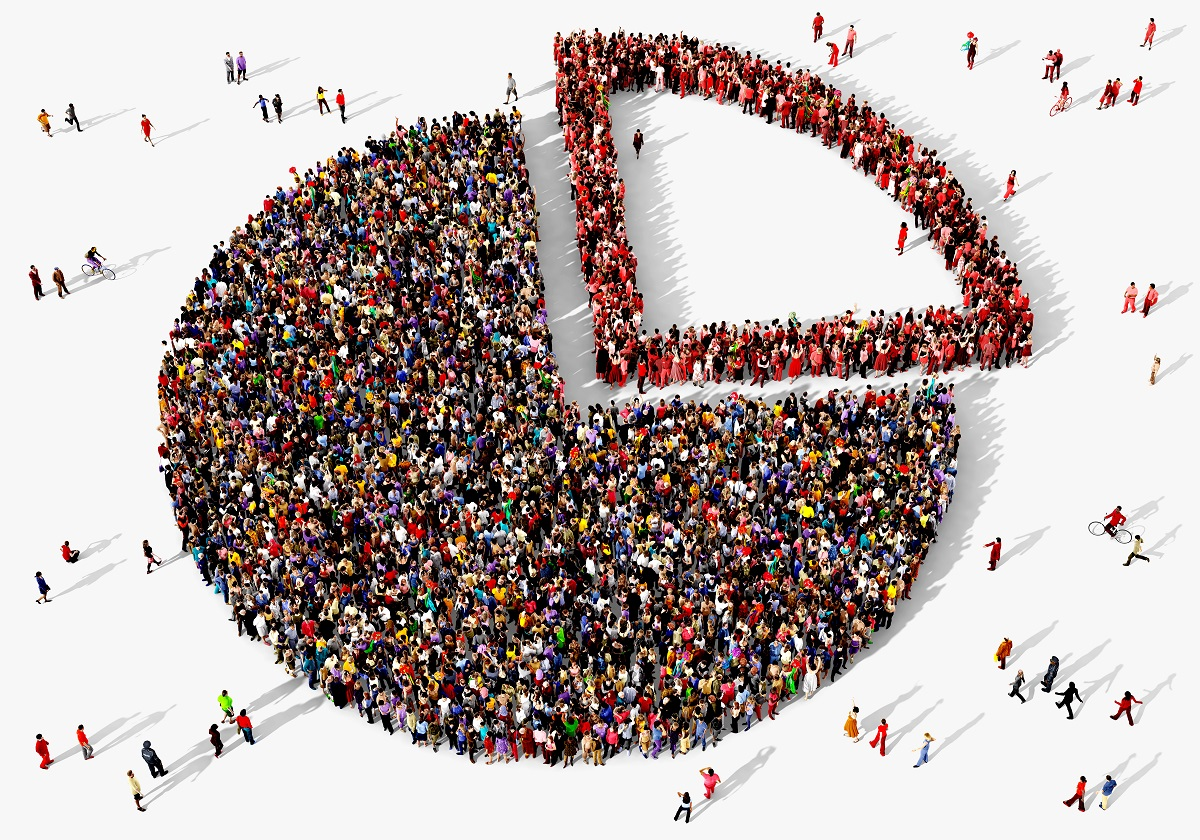

In [ ]:
Image("/content/Untitled.jpg",width=800)

INTRODUCTION This notebook explores customer segmentation and analysis based on a dataset from a shopping mall.This dataset includes customer information such as                               
BALANCE                               
BALANCE_FREQUENCY                    
PURCHASES                             
ONEOFF_PURCHASES                      
INSTALLMENTS_PURCHASES                
CASH_ADVANCE                          
PURCHASES_FREQUENCY                   
ONEOFF_PURCHASES_FREQUENCY            
PURCHASES_INSTALLMENTS_FREQUENCY      
CASH_ADVANCE_FREQUENCY                
CASH_ADVANCE_TRX                      
PURCHASES_TRX                         
CREDIT_LIMIT                          
PAYMENTS                              
MINIMUM_PAYMENTS                    
PRC_FULL_PAYMENT                      
TENURE                                

PURPOSE: The goal of this analysis is to cluster customers based on their attributes and behaviours .By segmenting customers,we aim to gain insights into their preferences and tailor marketing strategies to improve customer satisfaction and optimize business operations

TECHNIQUE USED IN DEVELOPMENT OF THE MODEL
1.Problem Identification & Business Understanding
2.Data Acquisition
3.Data Preparation
4. Exploratory Data Analysis (EDA)
5. Modeling
6.Model Evaluation

IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing  import StandardScaler
scalar=StandardScaler()
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")


LOADING THE DATASET

In [ ]:
df = pd.read_csv("/content/Customer Data.xls - Customer Data.xls(1)(1).csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


EDA(EXPLORATORY DATA ANALYSIS)

In [ ]:
df.shape

(8950, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

CHECK FOR NULL VALUES

In [ ]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
#filling mean values in place of missing values in the dataset
df["MINIMUM_PAYMENTS"] = df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean())
df["CREDIT_LIMIT"] = df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean())

In [ ]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

DESCRIPTIVE STATISTICS

In [ ]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
#CHECKING FOR DUPLICATES
df.duplicated().sum()

0

In [ ]:
#drop CUST_ID  COLUMN BECAUSE IT IS NOT USED
df.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [ ]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

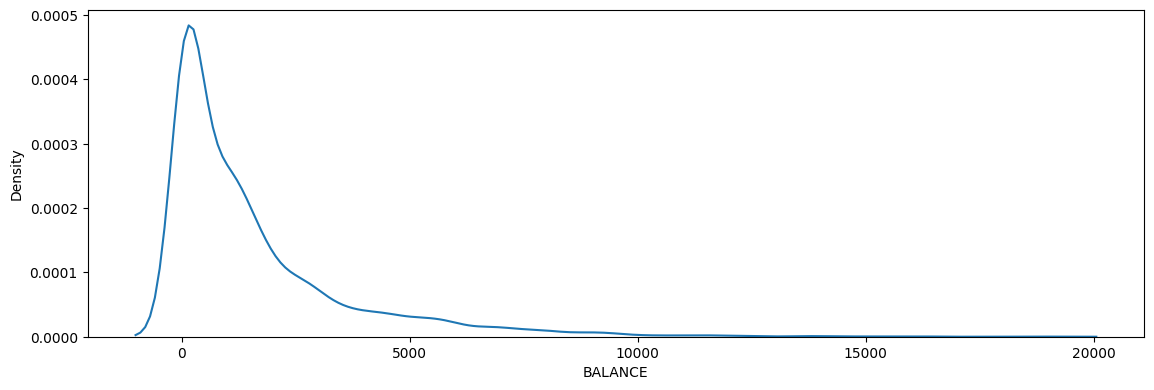

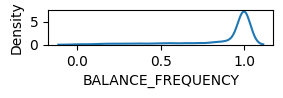

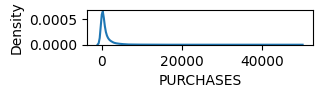

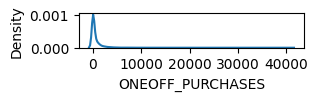

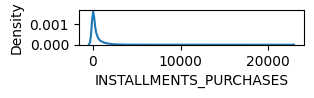

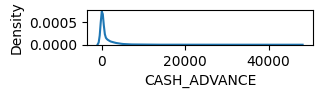

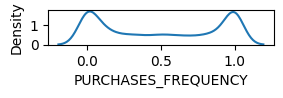

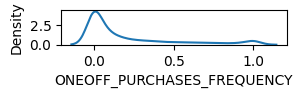

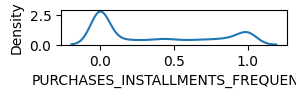

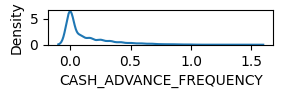

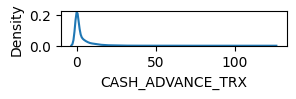

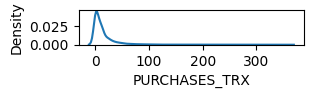

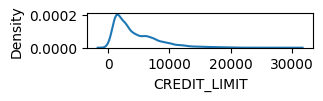

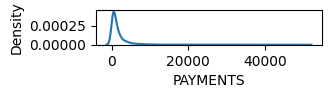

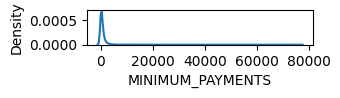

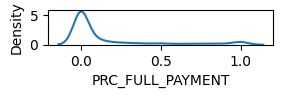

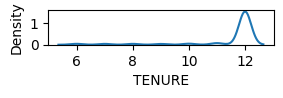

In [ ]:
plt.figure(figsize=(30,45))
for i,col in enumerate(df.columns):
  if df[col].dtype !='object':
    ax = plt.subplot(9,2,i+1)
    sns.kdeplot(df[col],ax=ax)
    plt.xlabel(col)
    plt.show()

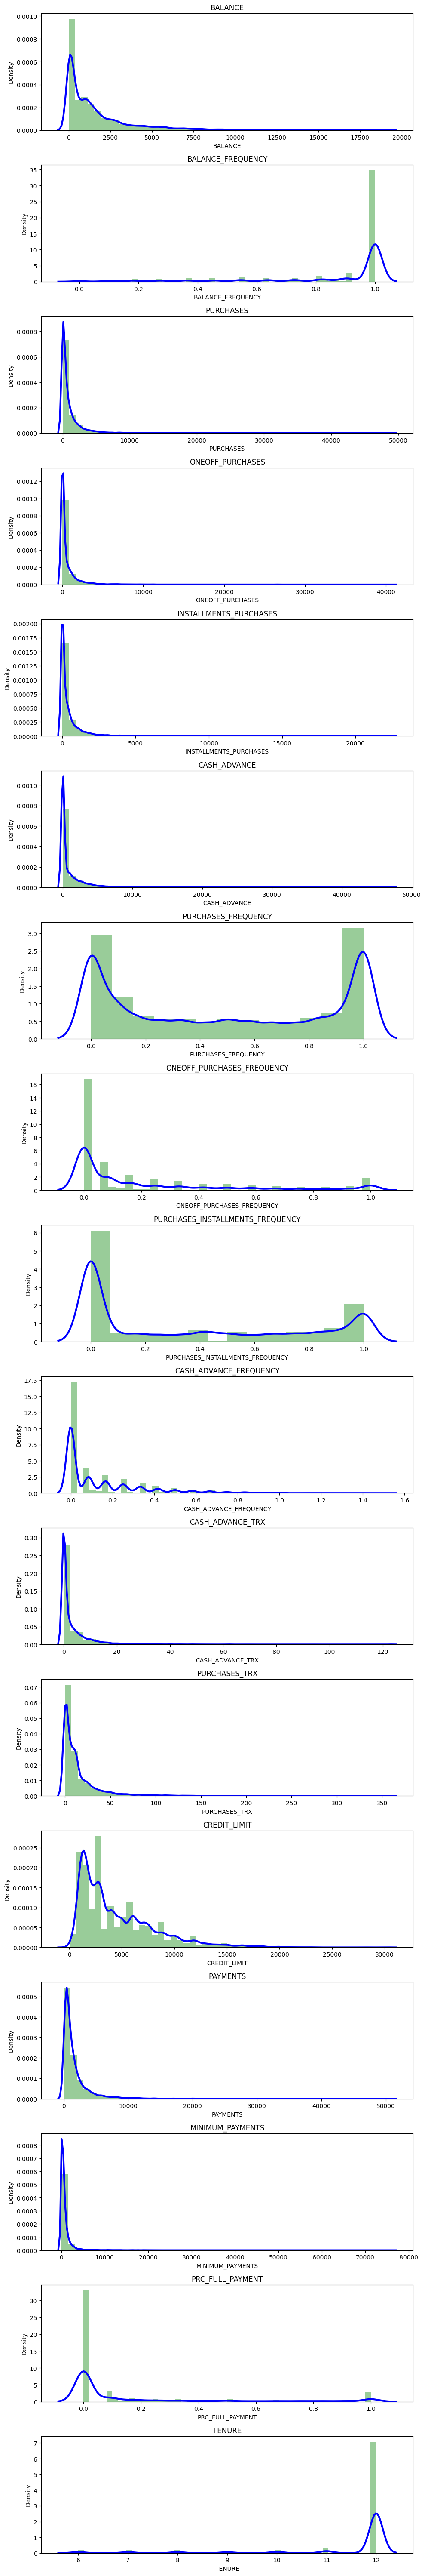

In [ ]:
plt.figure(figsize=(10,60))
for i in range(0,17):
  plt.subplot(17,1,i+1)
  sns.distplot(df[df.columns[i]],kde_kws={'color':"b",'bw':0.1,'lw':3,"label":"KDE"},hist_kws={"color":"g"})
  plt.title(df.columns[i])
  plt.tight_layout()

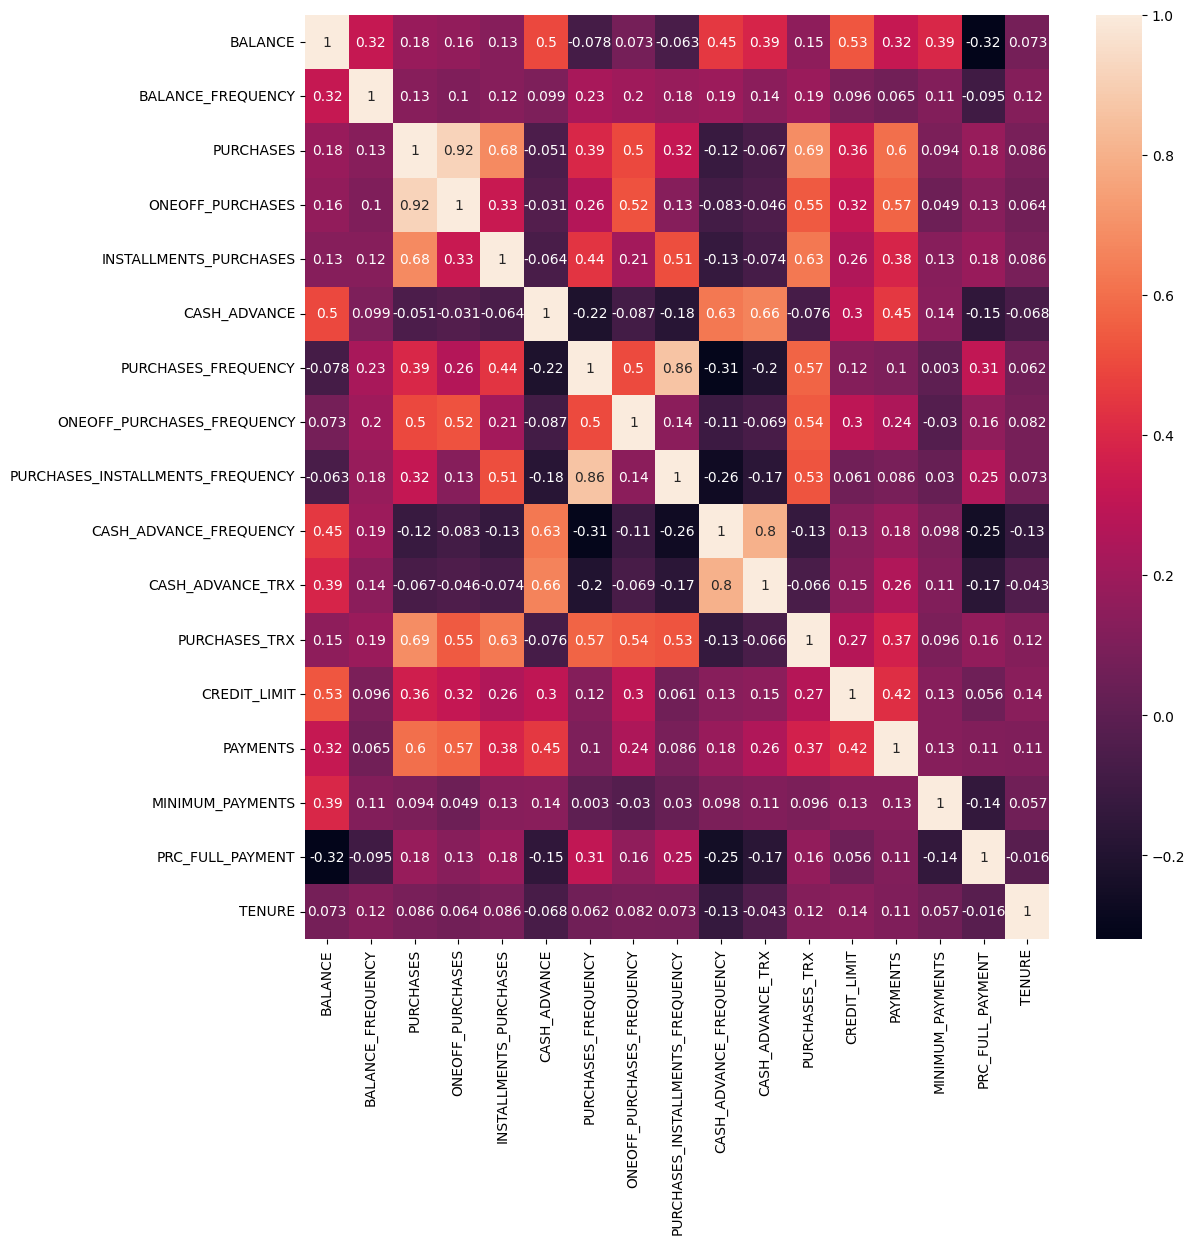

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)
plt.show()

SCALING THE DATAFRAME

In [ ]:
#FEATURE SCALING
scalar=StandardScaler()
scaled_df = scalar.fit_transform(df)

DIMENSIONALITY REDUCTION
#Converting the dataframe to 2D  Dataframe for vizualization

In [ ]:
pca=PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(data=principal_components,columns=["PCA1","PCA2"])
pca_df

,PCA1,PCA2
0,-1.682219,-1.076448
1,-1.138296,2.506469
2,0.969686,-0.383521
3,-0.873623,0.043170
4,-1.599434,-0.688578
...,...,...
8945,-0.359629,-2.016140
8946,-0.564370,-1.639118
8947,-0.926203,-1.810780
8948,-2.336555,-0.657964


HYPAPARAMETER  TUNING

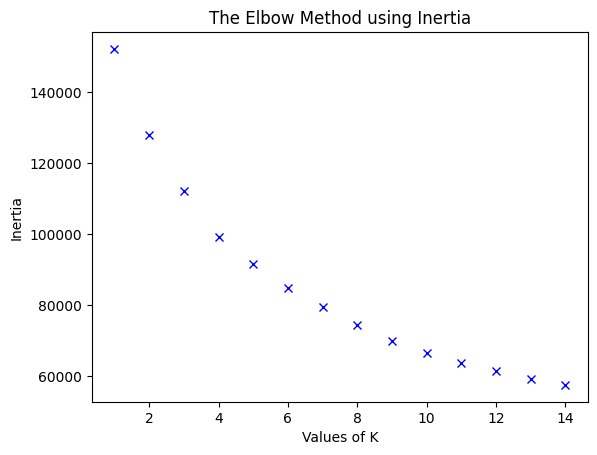

In [ ]:
#Finding "k value by elbow method"
#Finding "k value by elbow method"
inertia = []
range_val = range(1,15)
for i in range_val:
  kmean = KMeans(n_clusters=i)
  kmean.fit_predict(pd.DataFrame(scaled_df))
  inertia.append(kmean.inertia_)

for i, inertia_value in zip(range_val, inertia):
  plt.plot(i, inertia_value, 'bx-')
plt.xlabel("Values of K")
plt.ylabel("Inertia")
plt.title('The Elbow Method using Inertia')
plt.show()


MODEL BUILDING USING KMEANS

In [ ]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_df)
pca_df_kmeans= pd.concat([pca_df,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)

VISUALIZING  THE CLUSTERED DATAFRAME

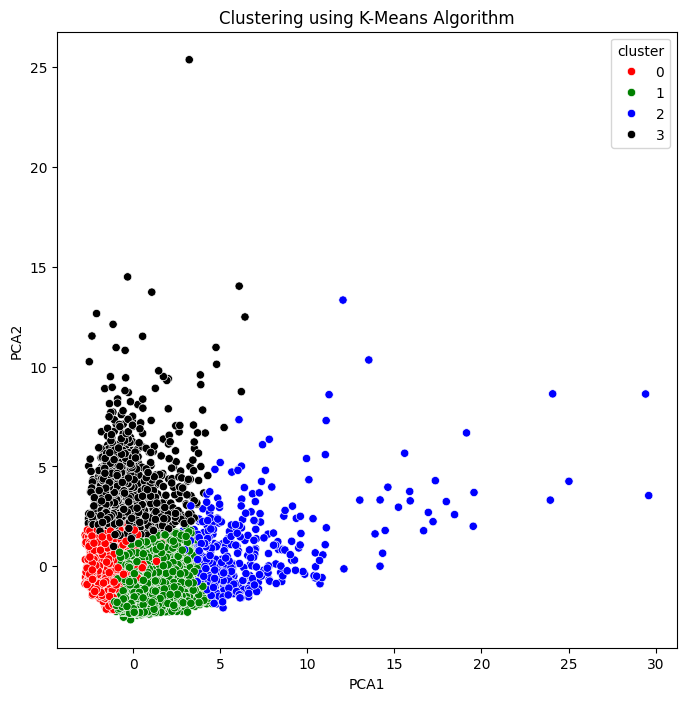

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_df_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

whenever using k always do a+-operation

In [ ]:
#find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[df.columns])
#inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1015.488596,0.790246,269.532524,209.577782,60.221429,598.835862,0.169796,0.086183,0.080330,0.115580,2.142427,2.899774,3275.093640,975.285174,587.216477,0.077756,11.444863
1,894.138544,0.934530,1235.622660,593.662603,642.234108,209.629482,0.884961,0.296919,0.711692,0.042449,0.788364,22.080736,4215.604112,1330.501779,649.775564,0.269271,11.594835
2,3551.153761,0.986879,7681.620098,5095.878826,2587.208264,653.638891,0.946418,0.739031,0.788060,0.071290,2.085575,89.359413,9696.943765,7288.739497,1976.815179,0.286707,11.951100
3,4613.446651,0.968544,504.684232,322.184358,182.585239,4536.818519,0.288967,0.139645,0.186326,0.484675,14.306465,7.700252,7572.421953,3497.457808,2014.549518,0.035064,11.391268


In [ ]:
#CREATING A TARGET COLUMN "CLUSTER" FOR STORING THE CLUSTER SEGMENT
cluster_df = pd.concat([df,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,1
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,1
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,0


In [ ]:
cluster_1_df = cluster_df[cluster_df["Cluster"]==0]
cluster_1_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.00,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.00,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.00,12,0
8,1014.926473,1.000000,861.49,661.49,200.0,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.00,12,0
9,152.225975,0.545455,1281.60,1281.60,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.00,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8939,728.352548,1.000000,734.40,734.40,0.0,239.891038,0.333333,0.333333,0.000000,0.166667,2,2,1000.0,72.530037,110.950798,0.00,6,0
8943,5.871712,0.500000,20.90,20.90,0.0,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,0
8948,13.457564,0.833333,0.00,0.00,0.0,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0


In [ ]:
cluster_2_df = cluster_df[cluster_df["Cluster"]==1]
cluster_2_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
2,2495.148862,1.000000,773.17,773.17,0.00,0.0,1.000000,1.00,0.000000,0.0,0,12,7500.0,622.066742,627.284787,0.00,12,1
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.0,0.666667,0.00,0.583333,0.0,0,8,1800.0,1400.057770,2407.246035,0.00,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.0,1.000000,0.00,1.000000,0.0,0,12,2300.0,679.065082,532.033990,0.00,12,1
10,1293.124939,1.000000,920.12,0.00,920.12,0.0,1.000000,0.00,1.000000,0.0,0,12,1200.0,1083.301007,2172.697765,0.00,12,1
12,1516.928620,1.000000,3217.99,2500.23,717.76,0.0,1.000000,0.25,0.916667,0.0,0,26,3000.0,608.263689,490.207013,0.25,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8940,130.838554,1.000000,591.24,0.00,591.24,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,475.523262,82.771320,1.00,6,1
8942,40.829749,1.000000,113.28,0.00,113.28,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,94.488828,86.283101,0.25,6,1
8945,28.493517,1.000000,291.12,0.00,291.12,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,325.594462,48.886365,0.50,6,1
8946,19.183215,1.000000,300.00,0.00,300.00,0.0,1.000000,0.00,0.833333,0.0,0,6,1000.0,275.861322,864.206542,0.00,6,1


In [ ]:
cluster_3_df = cluster_df[cluster_df["Cluster"]==2]
cluster_3_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,2
21,6369.531318,1.000000,6359.95,5910.04,449.91,229.028245,1.000000,0.916667,1.000000,0.333333,6,92,11250.0,2077.959051,1659.775075,0.000000,12,2
57,2386.330629,1.000000,5217.62,4789.09,428.53,0.000000,0.916667,0.916667,0.500000,0.000000,0,42,7500.0,5678.729613,1311.514878,0.083333,12,2
84,1935.362486,1.000000,4915.60,4515.34,400.26,293.844792,1.000000,1.000000,0.333333,0.083333,1,50,9000.0,4921.066897,594.756686,0.000000,12,2
90,9381.255094,1.000000,5100.07,1147.83,3952.24,370.737197,1.000000,0.250000,0.916667,0.083333,1,46,9000.0,6409.496345,9827.045323,0.000000,12,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8215,4436.557694,1.000000,6005.90,5838.38,167.52,567.971877,1.000000,0.583333,0.916667,0.083333,1,61,10500.0,1650.425296,1067.515656,0.000000,12,2
8541,3326.323283,1.000000,8209.77,2218.28,5991.49,0.000000,1.000000,0.416667,1.000000,0.000000,0,130,10000.0,1942.074765,702.905059,0.083333,12,2
8662,599.909949,1.000000,4947.32,3149.59,1797.73,0.000000,1.000000,1.000000,0.916667,0.000000,0,73,3000.0,5024.430008,218.172915,0.083333,12,2
8689,368.318662,0.909091,8053.95,8053.95,0.00,0.000000,0.833333,0.833333,0.000000,0.000000,0,46,2000.0,7966.582037,219.761189,0.777778,12,2


In [ ]:
cluster_4_df = cluster_df[cluster_df["Cluster"]==3]
cluster_4_df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
15,6886.213231,1.000000,1611.70,0.00,1611.70,2301.491267,0.500000,0.000000,0.500000,0.166667,4,11,8000.0,1993.439277,2109.906490,0.000000,12,3
23,3800.151377,0.818182,4248.35,3454.56,793.79,7974.415626,1.000000,0.083333,0.916667,0.333333,13,13,9000.0,9479.043842,1425.426525,0.000000,12,3
24,5368.571219,1.000000,0.00,0.00,0.00,798.949863,0.000000,0.000000,0.000000,0.363636,4,0,6000.0,1422.726707,1657.002877,0.000000,11,3
28,7152.864372,1.000000,387.05,204.55,182.50,2236.145259,0.666667,0.166667,0.416667,0.833333,16,8,10500.0,1601.448347,1648.851345,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8857,2330.222764,1.000000,1320.00,0.00,1320.00,14926.790590,0.428571,0.000000,0.285714,0.571429,10,3,10000.0,8157.666434,283.362434,0.200000,7,3
8858,812.934042,1.000000,50.00,50.00,0.00,2185.500596,0.142857,0.142857,0.000000,1.000000,16,1,3000.0,726.683966,127.843735,0.000000,7,3
8869,2171.222526,1.000000,791.18,791.18,0.00,2056.602480,0.428571,0.428571,0.000000,0.571429,6,8,3000.0,300.088696,453.100425,0.000000,7,3
8915,381.341657,1.000000,78.00,0.00,78.00,934.808869,1.000000,0.000000,0.833333,0.666667,16,6,1000.0,143.118373,85.152441,0.000000,6,3


<Axes: xlabel='Cluster', ylabel='count'>

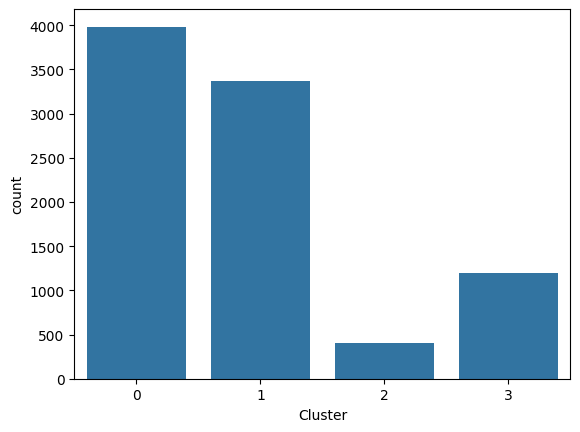

In [ ]:
#VIZUALIZATION
sns.countplot(x='Cluster',data=cluster_df)

insight:MANY CUSTOMERS FALL IN CLUSTER 0 AND 1

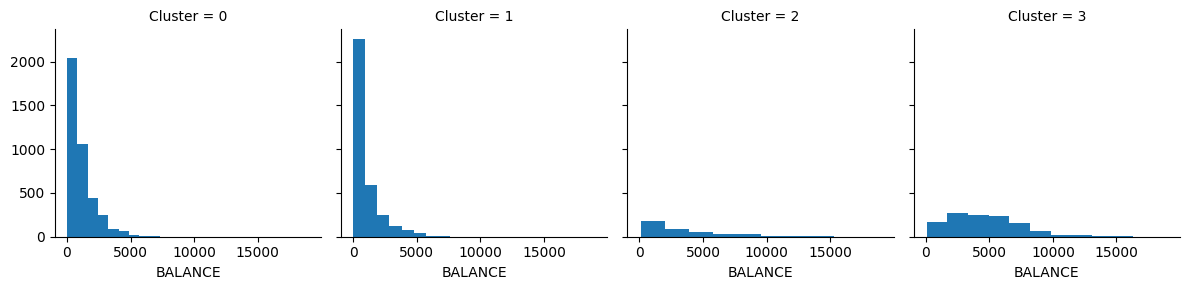

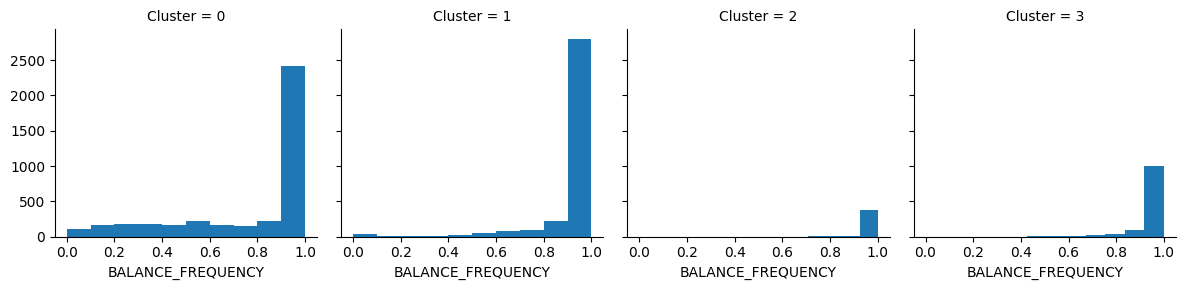

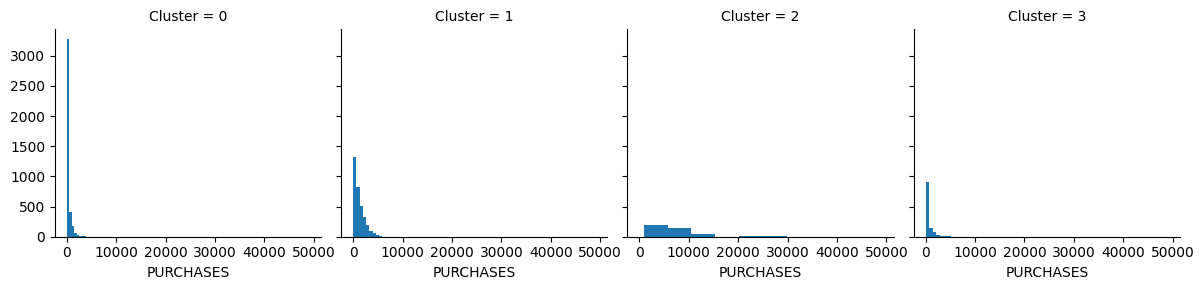

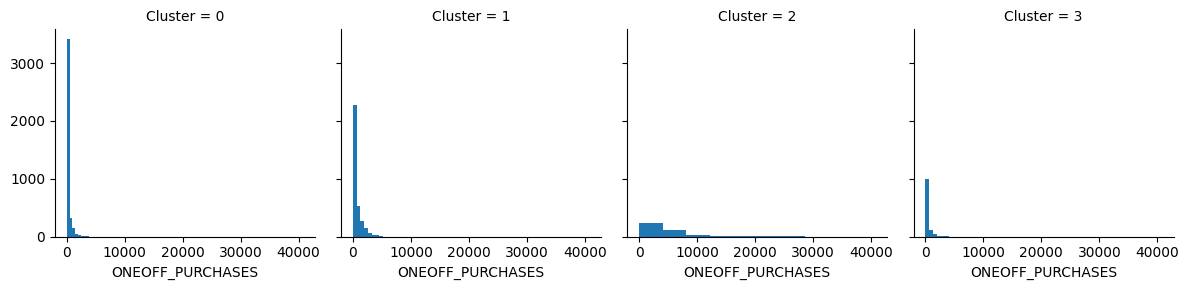

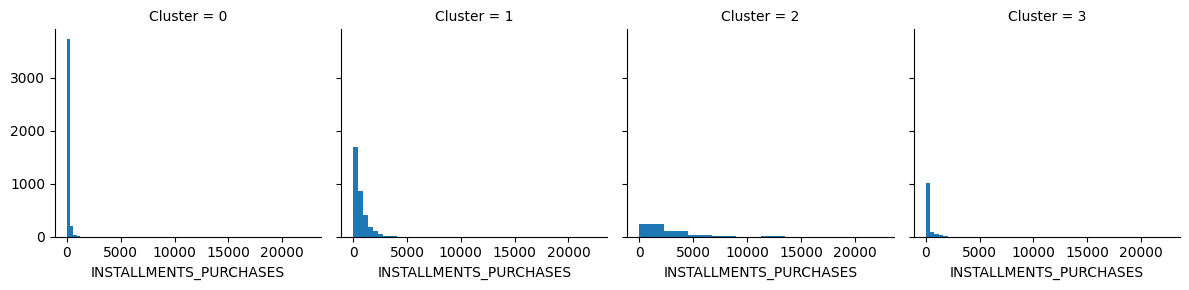

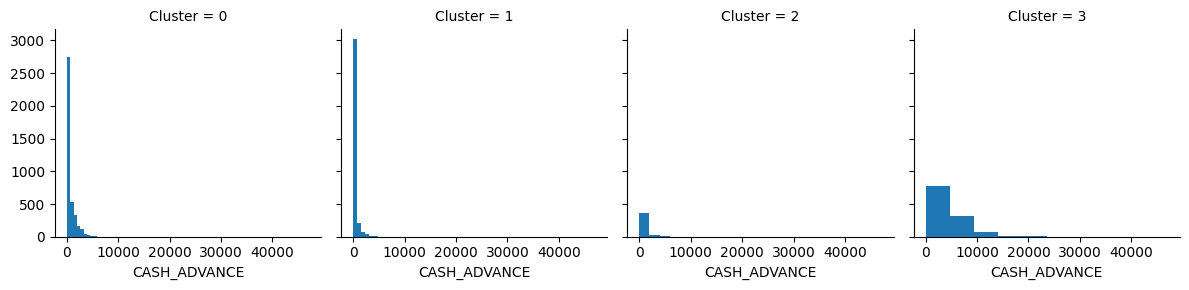

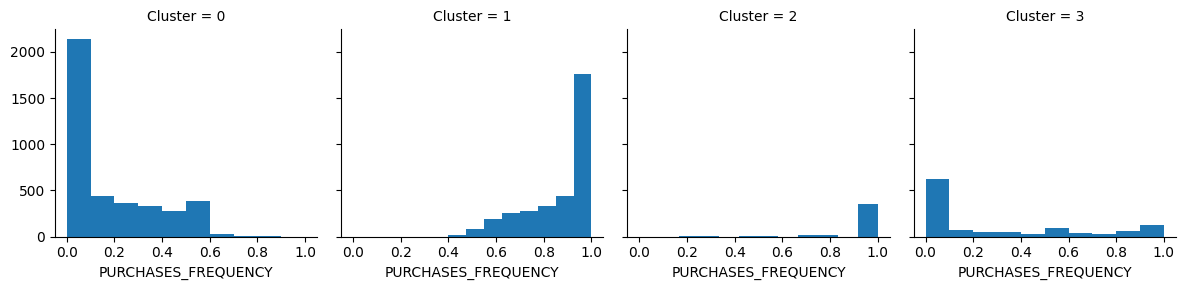

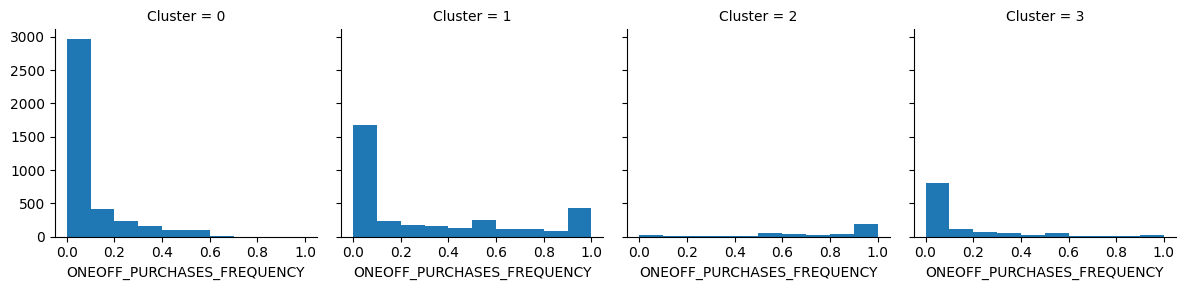

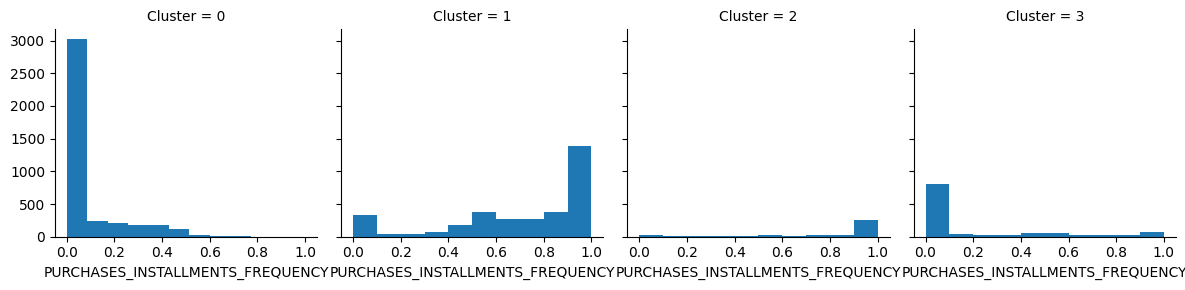

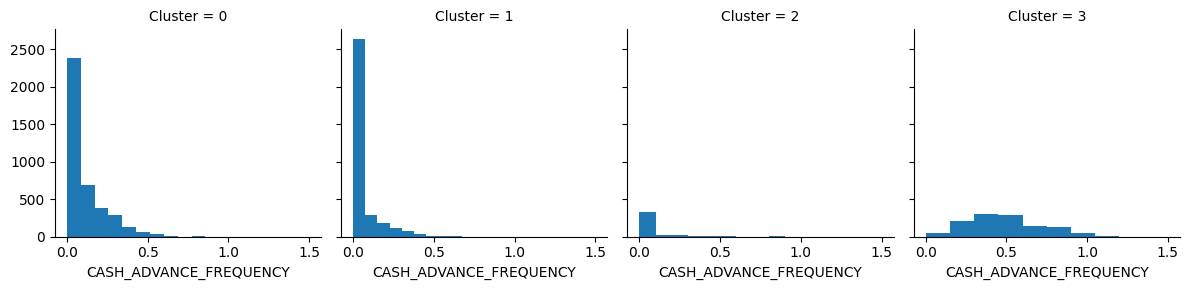

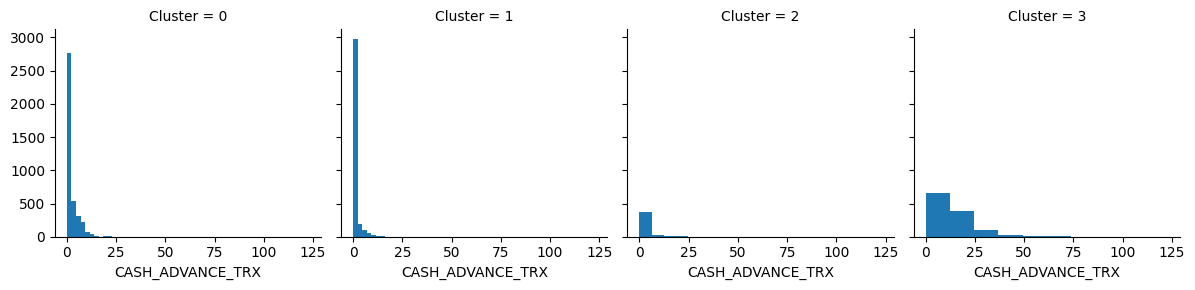

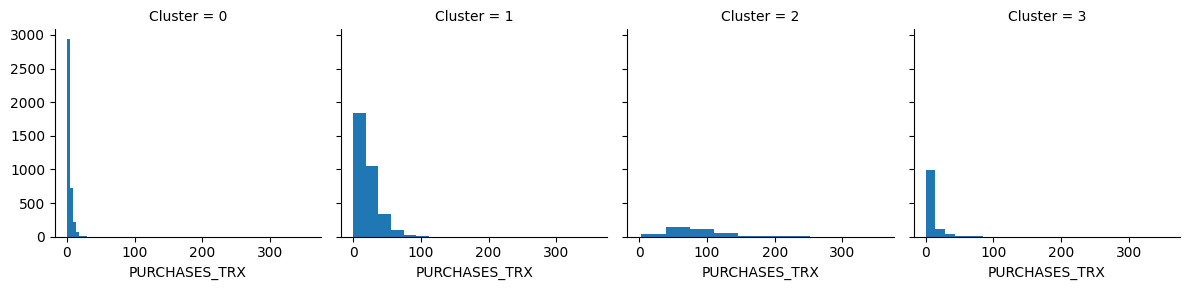

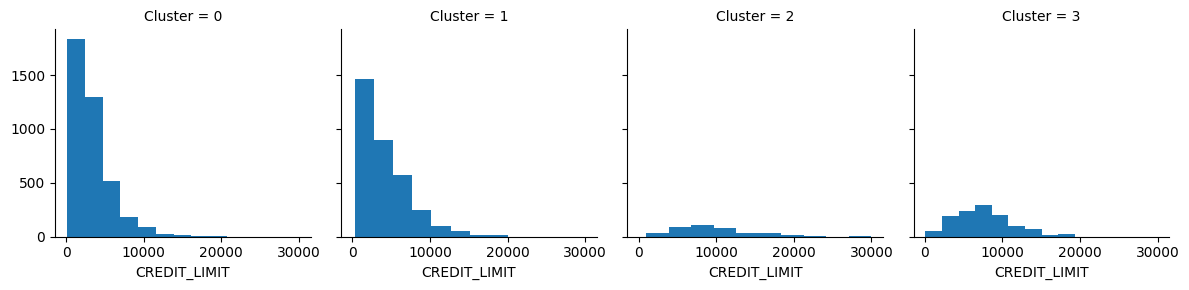

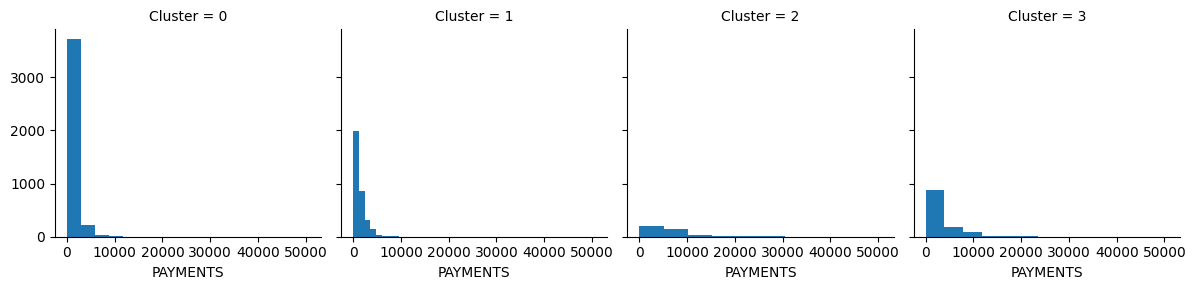

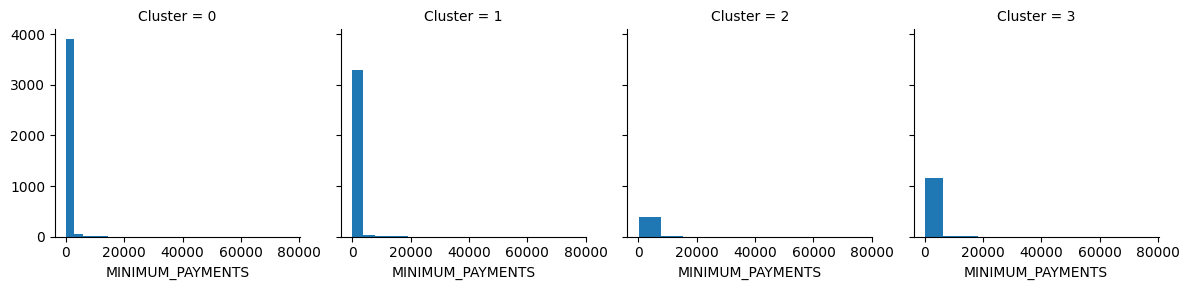

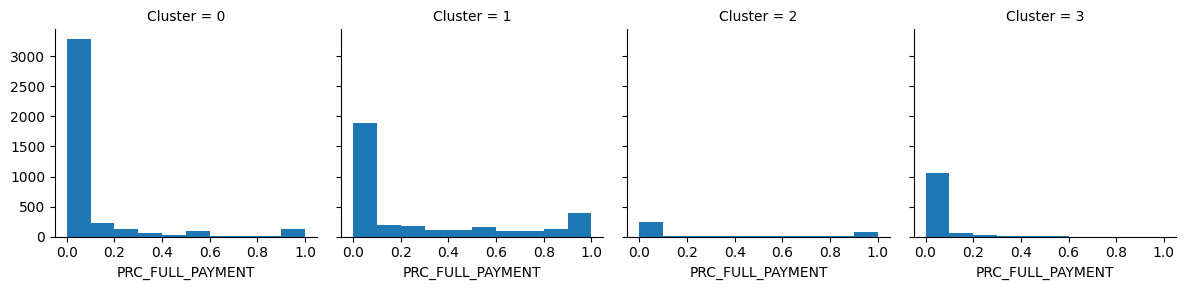

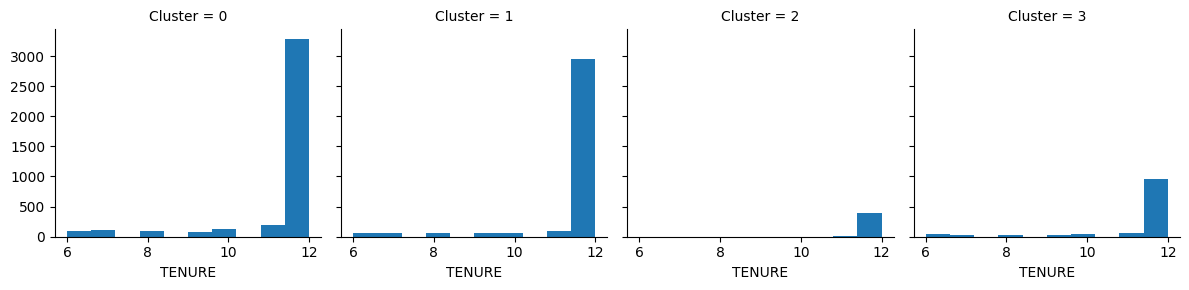

In [ ]:
for c in cluster_df.drop(['Cluster'],axis=1):
  grid = sns.FacetGrid(cluster_df,col="Cluster")
  grid = grid.map(plt.hist,c)
  plt.show()

SAVING THE KMEANS  CLUSTERING MODEL AND DATA WITH CLUSTER LABEL

In [ ]:
#saving scikitlearn models
import joblib
joblib.dump(kmeans_model,"kmeans_model.pk1")

['kmeans_model.pk1']

In [ ]:
cluster_df.to_csv("Clustered_Customer_Data.csv")

TRAINING AND TESTING THE MODEL ACCURACY USING DECISION TREE

In [ ]:
#SPLITTING THE DATASET
X = cluster_df.drop(['Cluster'],axis=1)
y= cluster_df[["Cluster"]]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
X_train

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
6814,847.349752,1.000000,295.83,0.00,295.83,988.908614,1.000000,0.000000,0.888889,0.222222,3,9,1000.0,70.777666,3831.115551,0.142857,9
3556,6930.149580,1.000000,0.00,0.00,0.00,1710.197063,0.000000,0.000000,0.000000,0.166667,2,0,7500.0,1915.638655,1787.885357,0.000000,12
3024,6995.302500,1.000000,999.77,0.00,999.77,6507.113368,0.750000,0.000000,0.750000,0.583333,16,14,8000.0,2863.397049,2553.534465,0.000000,12
3829,1110.047967,1.000000,0.00,0.00,0.00,569.881041,0.000000,0.000000,0.000000,0.083333,1,0,3500.0,3544.922751,554.980660,0.083333,12
634,4925.502001,1.000000,3050.72,989.14,2061.58,10901.298270,0.583333,0.333333,0.333333,0.416667,24,16,11500.0,21320.896250,3913.712987,0.166667,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2066,1414.878106,1.000000,98.08,68.42,29.66,0.000000,0.166667,0.166667,0.083333,0.000000,0,3,1500.0,523.235492,535.880979,0.000000,12
3443,260.636327,1.000000,673.28,673.28,0.00,477.616267,0.583333,0.583333,0.000000,0.250000,6,29,300.0,1150.334467,435.025577,0.272727,12
4808,49.920897,1.000000,400.19,400.19,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,14,8500.0,363.703322,177.221407,0.727273,12
295,635.090434,0.818182,5758.71,2252.37,3506.34,0.000000,0.750000,0.250000,0.750000,0.000000,0,48,2900.0,7943.570210,197.416104,1.000000,12


In [ ]:
X_test

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
7343,146.616802,0.363636,0.00,0.00,0.00,614.430788,0.000000,0.000000,0.000000,0.166667,2,0,1200.0,216.978003,173.047732,0.000000,12
2330,1435.703308,1.000000,664.61,45.70,618.91,945.736707,0.666667,0.083333,0.500000,0.166667,3,15,7500.0,453.692206,358.574883,0.000000,12
1774,2303.956234,0.888889,0.00,0.00,0.00,5585.815801,0.000000,0.000000,0.000000,0.777778,21,0,6000.0,331.450159,443.577040,0.000000,9
2051,7842.784061,1.000000,5930.99,3862.79,2068.20,0.000000,1.000000,0.916667,1.000000,0.000000,0,168,11500.0,12493.778940,1780.353532,0.000000,12
6900,1460.077343,0.900000,79.80,79.80,0.00,3494.069968,0.100000,0.100000,0.000000,0.600000,16,1,2500.0,1967.368185,518.663889,0.000000,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4262,492.265287,1.000000,424.50,0.00,424.50,0.000000,0.250000,0.000000,0.250000,0.000000,0,3,4000.0,142.123847,292.596739,0.000000,12
5799,0.288293,0.090909,0.00,0.00,0.00,606.181610,0.000000,0.000000,0.000000,0.083333,1,0,2000.0,3630.305137,82.240686,0.000000,12
7329,734.729977,0.727273,0.00,0.00,0.00,428.369390,0.000000,0.000000,0.000000,0.083333,5,0,1200.0,1596.300157,179.245282,0.181818,12
8393,2.660671,0.090909,102.79,0.00,102.79,0.000000,0.083333,0.000000,0.083333,0.000000,0,1,4000.0,203.229371,27.546920,0.090909,12


In [ ]:
#DECISION TREE
model = DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
#confusion matrix
print(metrics.confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1150   35    0   19]
 [  33  934   12   13]
 [   1   16  108    3]
 [  26   14    4  317]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1204
           1       0.93      0.94      0.94       992
           2       0.87      0.84      0.86       128
           3       0.90      0.88      0.89       361

    accuracy                           0.93      2685
   macro avg       0.91      0.90      0.91      2685
weighted avg       0.93      0.93      0.93      2685



SAVING THE DECISION  TREE MODEL FOR FUTURE PREDICTION

In [ ]:
import pickle

filename = 'final_model.sav'
pickle.dump(model,open(filename,'wb'))
result = model.score(X_test,y_test)
print(result,'%Accuracy')

0.9344506517690875 %Accuracy
